betaprime mu: 5.0
betaprime sigma: 3.873


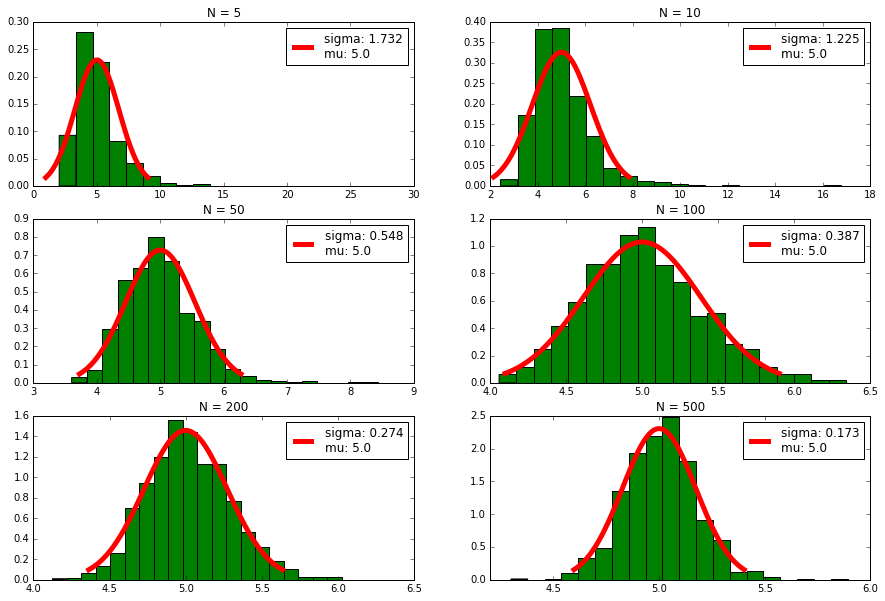

In [2]:
%matplotlib inline
from scipy.stats import betaprime, norm
import matplotlib.pyplot as plt
import numpy as np

# выбрано непрерывное распределение betaprime со значениями a = 15, b = 4
a, b = 15., 4.
bp_rv = betaprime(a, b)

# функция bp_mean возвращает массив, состоящий из средних значений 1000 выборок объема n 
bp_mean = lambda n: [bp_rv.rvs(size=n).mean() for i in range(1000)]

# математическое ожидание и стандартное отклонение вычисляются следующим образом
mu = a / (b-1)
sigma = np.sqrt(a*(a+b-1)/(b-2))/(b-1)

print("betaprime mu: " +  str(round(mu,3)))
print("betaprime sigma: " + str(round(sigma,3)))

# определяем ось значений x
x_norm = lambda n: np.linspace(norm.ppf(0.01,loc=mu,scale=sigma/np.sqrt(n)), 
                               norm.ppf(0.99,loc=mu,scale=sigma/np.sqrt(n)), 100)

# для каждого из n  строим кортеж, состоящий из массива средних значений, соответствующего ему 
# оси значений и нормального распределения (мат. ожидания у распределений совпадают, среднеквадратичные отклонения 
# отличаются в sqrt(n) раз) и самого значения n

data = [(bp_mean(n), x_norm(n), 
         norm.pdf(x_norm(n), loc=mu,scale=sigma/np.sqrt(n)), n) for n in (5,10,50,100,200,500)]

# всего будет 6 графиков (по числу значений n)
fig, axs = plt.subplots(3,2, figsize=(15,10))
axs = axs.ravel()

for idx,ax in enumerate(axs):
    ax.hist(data[idx][0], bins=20, normed=True, color='g')
    ax.set_title('N = '+ str(data[idx][3]))
    label = 'sigma: ' + str(round(sigma/np.sqrt(data[idx][3]),3)) + '\nmu: ' + str(round(mu,3))
    ax.plot(data[idx][1], data[idx][2],'r-', lw=5, label=label)
    ax.legend(loc='best')

# Выводы: 1) при возрастании n точность аппроксимации возрастает, 2) при малых n распределение смещено влево,
# 3) математические ожидания совпадают,среднеквадратичные отклонения отличаются в sqrt(n) раз